# Assignment 1
## Problem 1 - System Identification

In [44]:
%reload_ext autoreload
%autoreload 2

import sys
SRC_PATH = ["/Users/thomas/Code/22w_nlsp", "/home/fritz/Documents/NLSP/nlsp_ue/", "/home/roecker/Code/22w_nlsp_ue/"]

if any(map(lambda p: p not in sys.path, SRC_PATH)):
    sys.path.extend(SRC_PATH)
    

import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np
from functools import partial

from src.models.mls_models import PolynomialModel, RBFModel, MLPModel
from src.utils.plotting import init_plot_style
# %pylab

init_plot_style()
data_dir='../../data/csv/1_1_system_identification/'

First, let's take a look at the training and test data.

Fit and evaluate a polynomial model of varying order.

Compare the best train and test models.

Number of train samples is 25.
Number of test samples is 25.


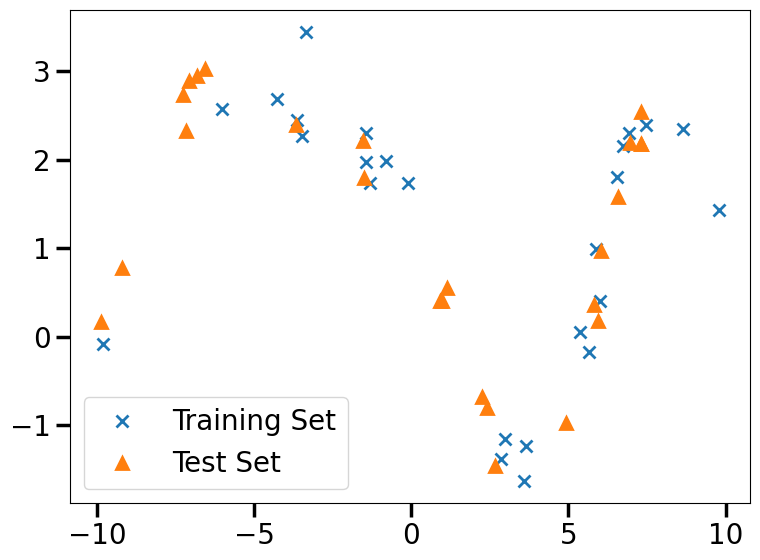

In [28]:
train_data = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = train_data[:,0], train_data[:,1]
print(f'Number of train samples is {len(x_train)}.')

test_data = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_data[:,0], test_data[:,1]
print(f'Number of test samples is {len(x_test)}.')

plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.legend()
plt.tight_layout()
plt.savefig("system_1_a.png")


Best train model has order 13 with train/test MSE is 0.07476021839153649 / 517.3186070843286.
Best test model has order 8 with train/test MSE is 0.09452772725244875 / 0.10132039455277539.


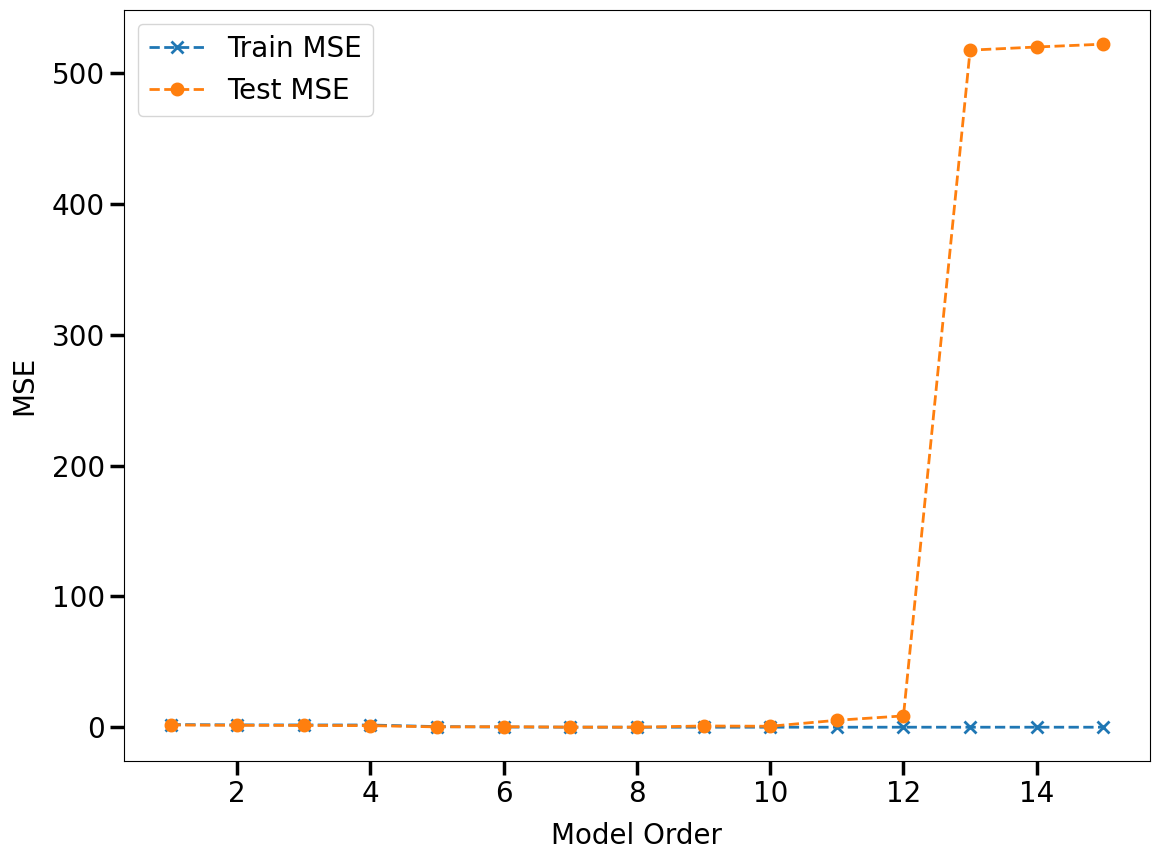

In [50]:
max_order = 15
ls = 100
# model_class = PolynomialModel
model_class = partial(RBFModel, lengthscale=ls)

train_mse_list = []
test_mse_list = []
for order in range(1, max_order+1):
    model = model_class(order)
    train_mse_list.append(model.fit(x_train, y_train))
    test_mse = np.mean((model.predict(x_test) - y_test)**2)
    test_mse_list.append(test_mse)

best_train_order = np.argmin(np.array(train_mse_list)) + 1
print(f'Best train model has order {best_train_order} with train/test MSE is {train_mse_list[best_train_order-1]} / {test_mse_list[best_train_order-1]}.')

best_test_order = np.argmin(np.array(test_mse_list)) + 1
print(f'Best test model has order {best_test_order} with train/test MSE is {train_mse_list[best_test_order-1]} / {test_mse_list[best_test_order-1]}.')

plt.close('all')
plt.figure()
plt.plot(list(range(1,max_order+1)), train_mse_list, 'x--', label='Train MSE')
plt.plot(list(range(1,max_order+1)), test_mse_list, 'o--', label='Test MSE')
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('MSE')
plt.tight_layout()
plt.savefig(f"{str(model)}_mse_order_{max_order}{f'_lengthscale_{ls}' if str(model) == 'RBFModel' else ''}.png", format='png')

In [51]:
from src.utils import array_to_md
array_to_md.array_to_md(np.array([np.arange(1, max_order + 1), train_mse_list, test_mse_list]).T)

| 1 | 2.068 | 1.779 |
| 2 | 1.846 | 1.529 |
| 3 | 1.785 | 1.415 |
| 4 | 1.751 | 1.271 |
| 5 | 0.535 | 0.314 |
| 6 | 0.217 | 0.477 |
| 7 | 0.118 | 0.118 |
| 8 | 0.095 | 0.101 |
| 9 | 0.082 | 1.011 |
| 10 | 0.081 | 0.795 |
| 11 | 0.077 | 5.361 |
| 12 | 0.076 | 8.726 |
| 13 | 0.075 | 517.319 |
| 14 | 0.075 | 519.721 |
| 15 | 0.075 | 521.897 |



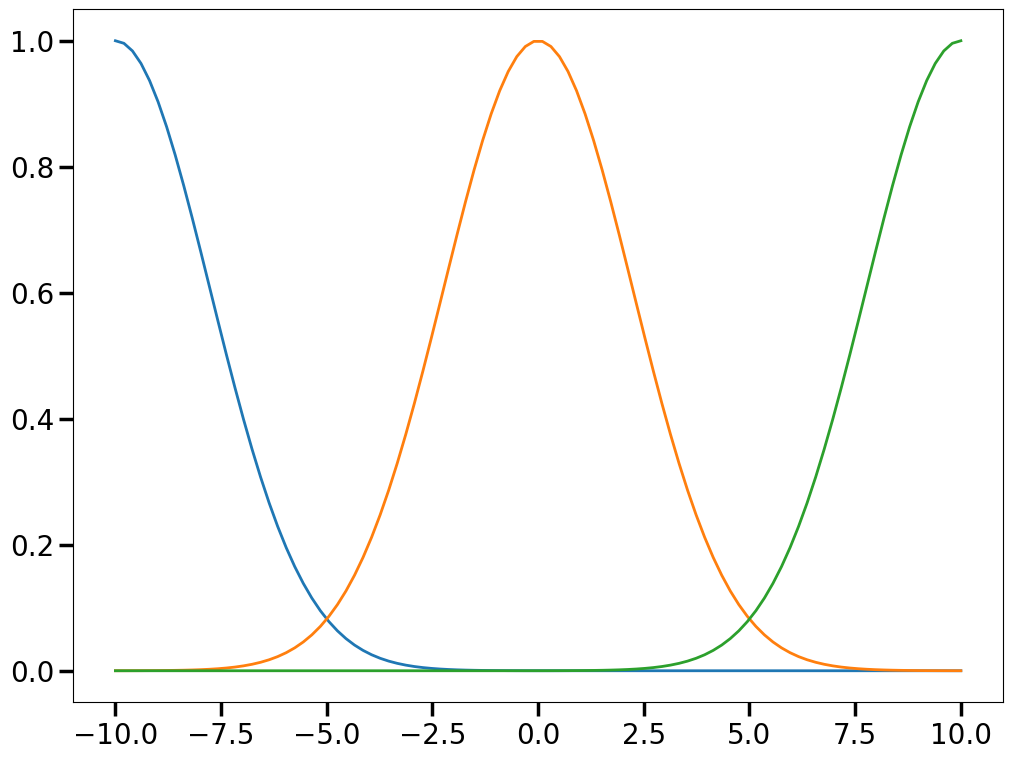

In [53]:
order = 3
width = 10
centers = np.linspace(-10, 10, order)
for c in centers:
    plt.plot(x_support, model.rbf(x_support, c, width))

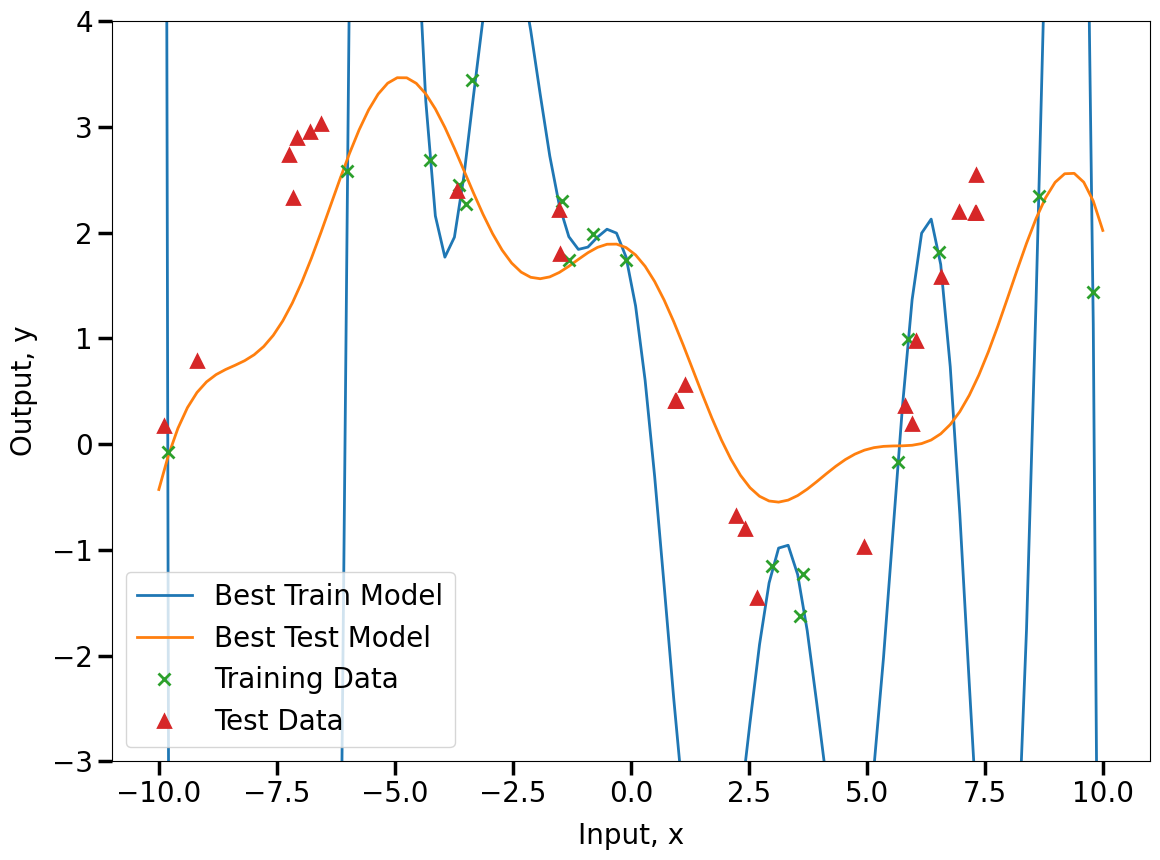

In [23]:
best_train_model = model_class(best_train_order)
_ = best_train_model.fit(x_train, y_train)

best_test_model = model_class(best_test_order)
_ = best_test_model.fit(x_train, y_train)


x_support = torch.linspace(-10., 10., 100).numpy()
plt.close('all')
plt.figure()
plt.plot(x_support, best_train_model.predict(x_support), label='Best Train Model')
plt.plot(x_support, best_test_model.predict(x_support), label='Best Test Model')

plt.plot(x_train, y_train, 'x', label='Training Data')
plt.plot(x_test, y_test, '^', label='Test Data')

plt.legend()
plt.xlabel('Input, x')
plt.ylabel('Output, y')
plt.ylim([-3, 4])
plt.tight_layout()
plt.savefig(f"{str(best_train_model)}_approximated_systems.png", format="png")
plt.show()

## Validation set section

Number of train samples is 18.
Number of validation samples is 7.
Number of test samples is 25.


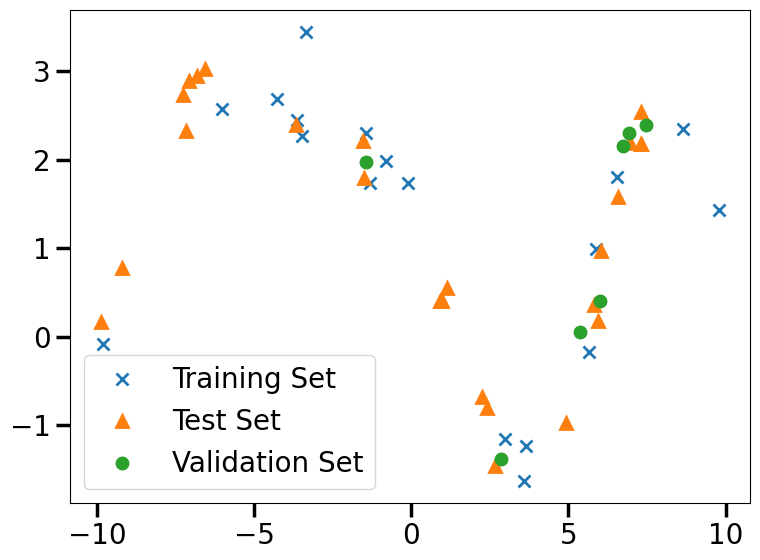

In [16]:
train_data = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
np.random.shuffle(train_data)
np.random.seed(100)
split = round(0.7*np.shape(train_data)[0])
x_train, y_train = train_data[0:split,0], train_data[0:split,1]
x_val, y_val = train_data[split::,0], train_data[split::,1]
print(f'Number of train samples is {len(x_train)}.')
print(f'Number of validation samples is {len(x_val)}.')

test_data = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_data[:,0], test_data[:,1]
print(f'Number of test samples is {len(x_test)}.')

plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_val, y_val, 'o', label='Validation Set')
plt.legend()
plt.tight_layout()
# plt.show()
plt.savefig("system_1_b_with_val.png", format='png')

Best train model has order 14 with train/validation MSE is 0.03139224513090808 / 57.99084869324285.
Best test model has order 6 with train/test MSE is 0.18319921129249941 / 0.22046518253659386.
Best validation model has order 8 with train/validation MSE is 0.08795735966382273 / 0.07529452910944537.


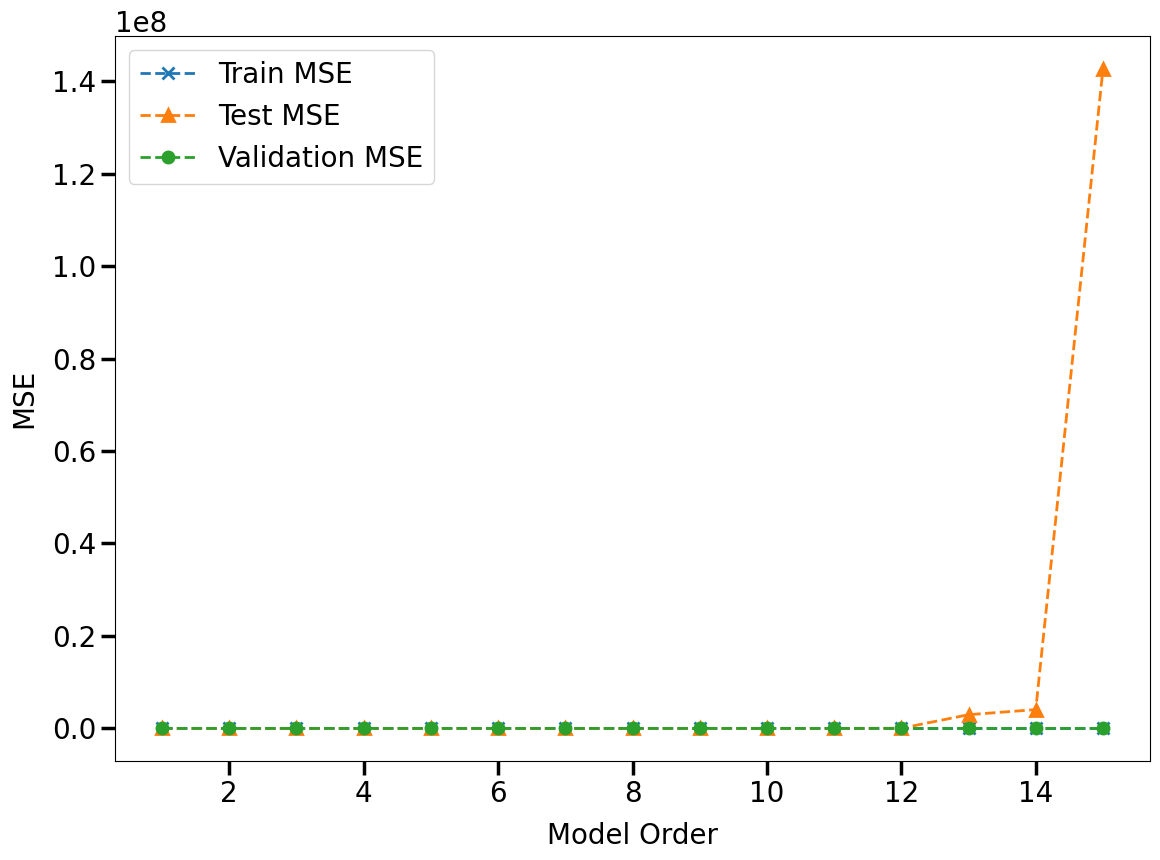

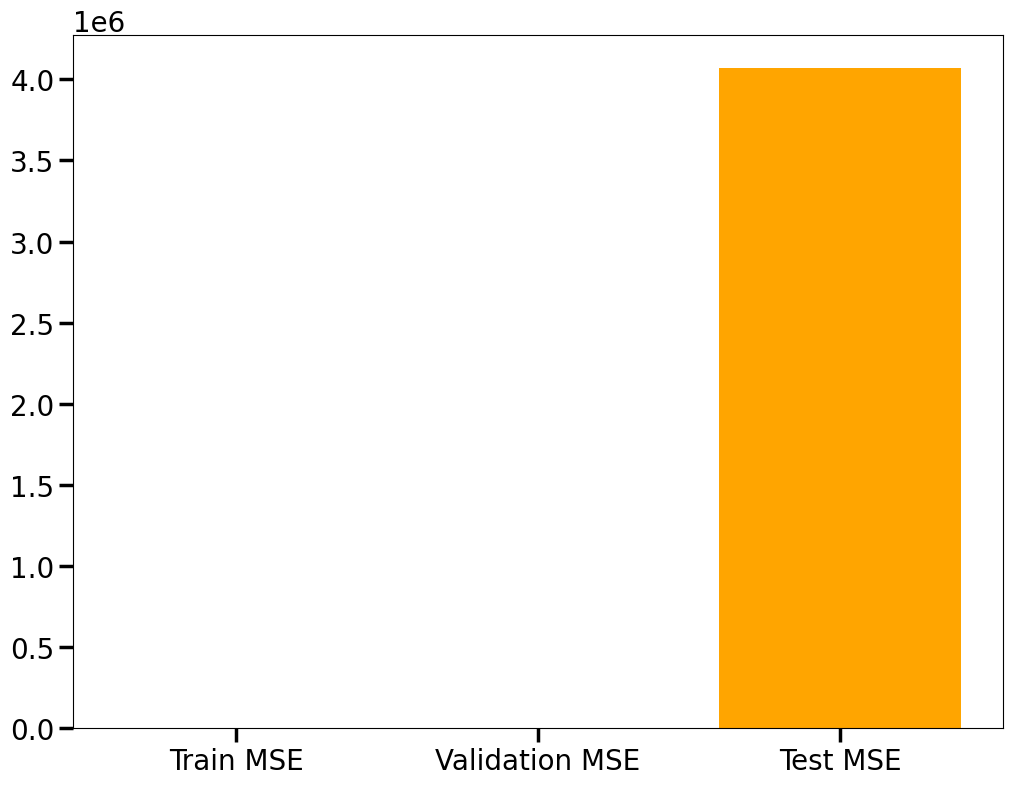

[2.0456982212868717,
 2.0364356230520224,
 2.0878138393928634,
 1.355732120863225,
 0.1935386824966047,
 0.1604589538058442,
 0.1023219682277536,
 0.07529452910944537,
 0.23674571887073612,
 0.1438328481544229,
 0.13209093952876053,
 2.1753286676282686,
 68.00608564992196,
 57.99084869324285,
 322.36050436707444]

In [25]:
max_order = 15
model_class = PolynomialModel

train_mse_list = []
test_mse_list = []
validation_mse_list = []
for order in range(1, max_order+1):
    model = model_class(order)
    train_mse_list.append(model.fit(x_train, y_train))
    validation_mse = np.mean((model.predict(x_val) - y_val)**2)
    validation_mse_list.append(validation_mse)
    test_mse = np.mean((model.predict(x_test) - y_test)**2)
    test_mse_list.append(test_mse)

best_train_order = np.argmin(np.array(train_mse_list)) + 1
print(f'Best train model has order {best_train_order} with train/validation MSE is {train_mse_list[best_train_order-1]} / {validation_mse_list[best_train_order-1]}.')
best_test_order = np.argmin(np.array(test_mse_list)) + 1
print(f'Best test model has order {best_test_order} with train/test MSE is {train_mse_list[best_test_order-1]} / {test_mse_list[best_test_order-1]}.')
best_validation_order = np.argmin(np.array(validation_mse_list)) + 1
print(f'Best validation model has order {best_validation_order} with train/validation MSE is {train_mse_list[best_validation_order-1]} / {validation_mse_list[best_validation_order-1]}.')

plt.close('all')
plt.figure()
plt.plot(list(range(1,max_order+1)), train_mse_list, 'x--', label='Train MSE')
plt.plot(list(range(1,max_order+1)), test_mse_list, '^--', label='Test MSE')
plt.plot(list(range(1,max_order+1)), validation_mse_list, 'o--', label='Validation MSE')
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('MSE')
plt.tight_layout()
plt.savefig(f"{str(model)}_mse_order_with_val_{max_order}.png", format='png')
plt.show()
plt.figure()
# create a dataset
height = [train_mse_list[best_train_order-1], validation_mse_list[best_train_order-1], test_mse_list[best_train_order-1]]
bars = ("Train MSE", "Validation MSE", "Test MSE")
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['blue', 'green', 'orange'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()
validation_mse_list

In [26]:
from src.utils import array_to_md
array_to_md.array_to_md(np.array([np.arange(1, max_order + 1), train_mse_list, test_mse_list, validation_mse_list]).T)

| 1 | 1.968 | 1.65 | 2.046 |
| 2 | 1.968 | 1.646 | 2.036 |
| 3 | 0.749 | 1.004 | 2.088 |
| 4 | 0.651 | 0.655 | 1.356 |
| 5 | 0.231 | 0.877 | 0.194 |
| 6 | 0.183 | 0.22 | 0.16 |
| 7 | 0.114 | 0.411 | 0.102 |
| 8 | 0.088 | 1.952 | 0.075 |
| 9 | 0.079 | 2.277 | 0.237 |
| 10 | 0.076 | 28.735 | 0.144 |
| 11 | 0.076 | 10.945 | 0.132 |
| 12 | 0.07 | 36661.82 | 2.175 |
| 13 | 0.032 | 2963295.72 | 68.006 |
| 14 | 0.031 | 4068576.683 | 57.991 |
| 15 | 0.034 | 142616469.776 | 322.361 |



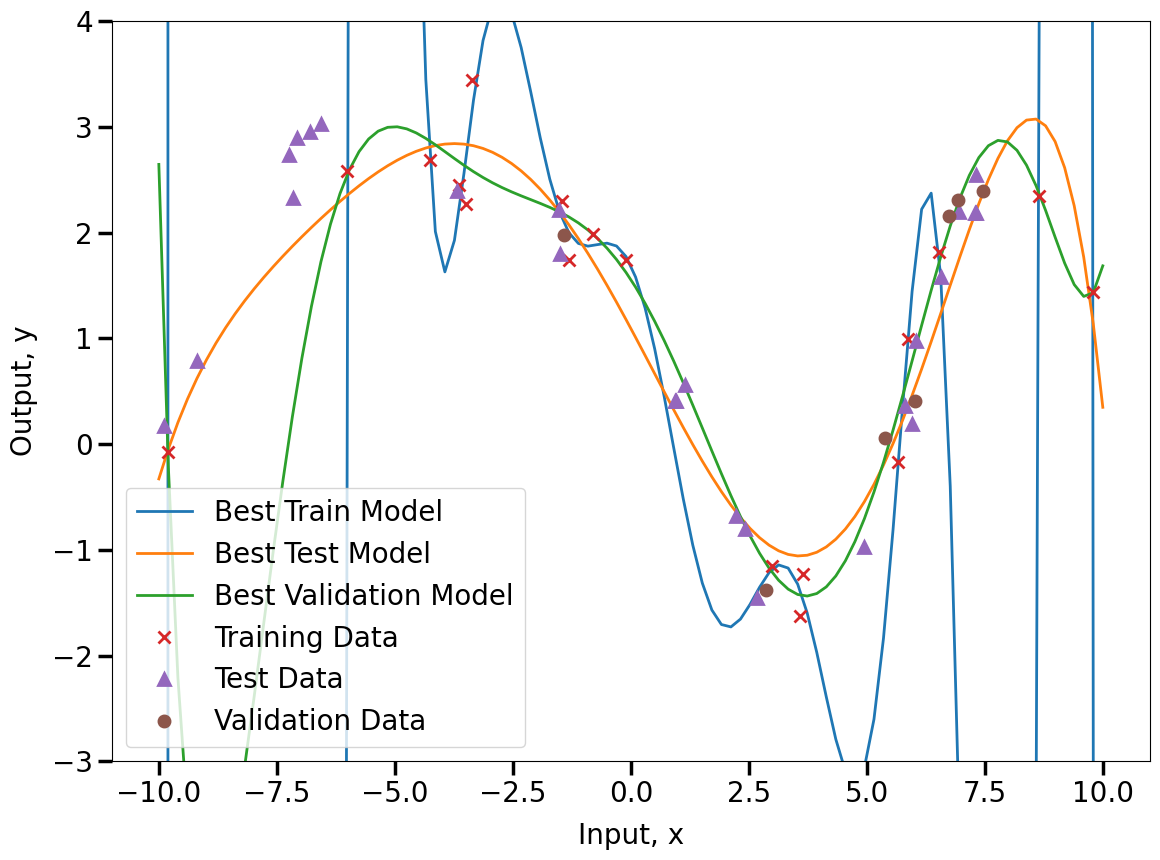

In [27]:
best_train_model = model_class(best_train_order)
_ = best_train_model.fit(x_train, y_train)

best_test_model = model_class(best_test_order)
_ = best_test_model.fit(x_train, y_train)

best_validation_model = model_class(best_validation_order)
_ = best_validation_model.fit(x_train, y_train)

x_support = torch.linspace(-10., 10., 100).numpy()
plt.close('all')
plt.figure()
plt.plot(x_support, best_train_model.predict(x_support), label='Best Train Model')
plt.plot(x_support, best_test_model.predict(x_support), label='Best Test Model')
plt.plot(x_support, best_validation_model.predict(x_support), label='Best Validation Model')
plt.plot(x_train, y_train, 'x', label='Training Data')
plt.plot(x_test, y_test, '^', label='Test Data')
plt.plot(x_val, y_val, 'o', label='Validation Data')
plt.legend()
plt.xlabel('Input, x')
plt.ylabel('Output, y')
plt.ylim([-3, 4])
plt.tight_layout()
plt.savefig(f"{str(best_train_model)}_approximated_systems_with_val.png", format="png")
plt.show()

| 1 | 1.975 | 1.645 |
| 2 | 1.946 | 1.571 |
| 3 | 0.986 | 0.677 |
| 4 | 0.736 | 0.527 |
| 5 | 0.202 | 0.998 |
| 6 | 0.164 | 0.251 |
| 7 | 0.107 | 0.404 |
| 8 | 0.082 | 1.464 |
| 9 | 0.081 | 0.414 |
| 10 | 0.076 | 27.591 |
| 11 | 0.076 | 61.323 |
| 12 | 0.075 | 2037.45 |
| 13 | 0.052 | 543525.33 |
| 14 | 0.051 | 1576728.601 |
| 15 | 0.102 | 13076714.76 |



### RBF

### Feed Forward NN

In [128]:
# compute the approximated system behavior and the prediction for our test set
# torch.tanh, torch.relu, torch.selu
activation_functions = {
    "tanh": torch.tanh,
    "relu": torch.relu,
    "selu": torch.selu
}

layers = [
    [0,], [1,], [5,], [10,], [32,], [64,], [1, 1], [5, 5], [10, 10], [32, 32], 
    [64, 64], [10, 10, 10], [32, 32, 32], [64, 32, 16], [32, 64, 32]
]
activation_function = 'tanh'
# activation_function = activation_functions
train_losses = []
test_losses = []
for layer in layers:

    mlp_model = MLPModel(hidden_sizes=layer, activation_function=activation_functions[activation_function])
    train_loss = mlp_model.fit(x_train, y_train)[-1]

    train_losses.append(train_loss)
    # approx_output = mlp_model.predict(x_support)
    y_pred = mlp_model.predict(x_test).ravel()

    # print(f'\nTraining MSE is {train_loss:.2f}')
    # print(f'Test MSE is {np.mean((y_test - y_pred)**2):.2f}')

    test_losses.append(np.mean((y_test - y_pred)**2))

activation_function2 = 'relu'
# activation_function = activation_functions
train_losses2 = []
test_losses2 = []
for layer in layers:

    mlp_model = MLPModel(hidden_sizes=layer, activation_function=activation_functions[activation_function2])
    train_loss = mlp_model.fit(x_train, y_train)[-1]

    train_losses2.append(train_loss)
    # approx_output = mlp_model.predict(x_support).ravel()
    y_pred = mlp_model.predict(x_test).ravel()

    # print(f'\nTraining MSE is {train_loss:.2f}')
    # print(f'Test MSE is {np.mean((y_test - y_pred)**2):.2f}')

    test_losses2.append(np.mean((y_test - y_pred)**2))


In [129]:
print("| Layers | $MSE_{train}$ (tanh) | $MSE_{train}$ (relu) | $MSE_{test}$ (tanh)| $MSE_{test}$ (relu) |")
print("| - |- |- |- |- |")
for layer, train_loss, train_loss2, test_loss, test_loss2 in zip(layers, train_losses, train_losses2 ,test_losses, test_losses2):
    print(f'| {layer} | {train_loss:.3f} | {train_loss2:.3f} | {test_loss:.3f} | {test_loss2:.3f} |')

| Layers | $MSE_{train}$ (tanh) | $MSE_{train}$ (relu) | $MSE_{test}$ (tanh)| $MSE_{test}$ (relu) |
| - |- |- |- |- |
| [0] | 2.156 | 2.156 | 1.784 | 1.782 |
| [1] | 1.337 | 1.847 | 1.325 | 1.659 |
| [5] | 0.766 | 0.322 | 1.092 | 0.776 |
| [10] | 0.365 | 0.312 | 0.783 | 0.721 |
| [32] | 0.177 | 0.262 | 0.472 | 0.688 |
| [64] | 0.169 | 0.322 | 0.464 | 0.933 |
| [1, 1] | 1.336 | 1.919 | 1.320 | 1.681 |
| [5, 5] | 0.858 | 0.392 | 0.944 | 0.699 |
| [10, 10] | 0.171 | 0.311 | 0.469 | 0.696 |
| [32, 32] | 0.166 | 0.133 | 0.510 | 0.417 |
| [64, 64] | 0.170 | 0.199 | 0.460 | 0.616 |
| [10, 10, 10] | 0.248 | 0.337 | 0.641 | 0.704 |
| [32, 32, 32] | 0.197 | 0.199 | 0.571 | 0.509 |
| [64, 32, 16] | 0.178 | 0.213 | 0.503 | 0.634 |
| [32, 64, 32] | 0.195 | 0.207 | 0.873 | 0.556 |


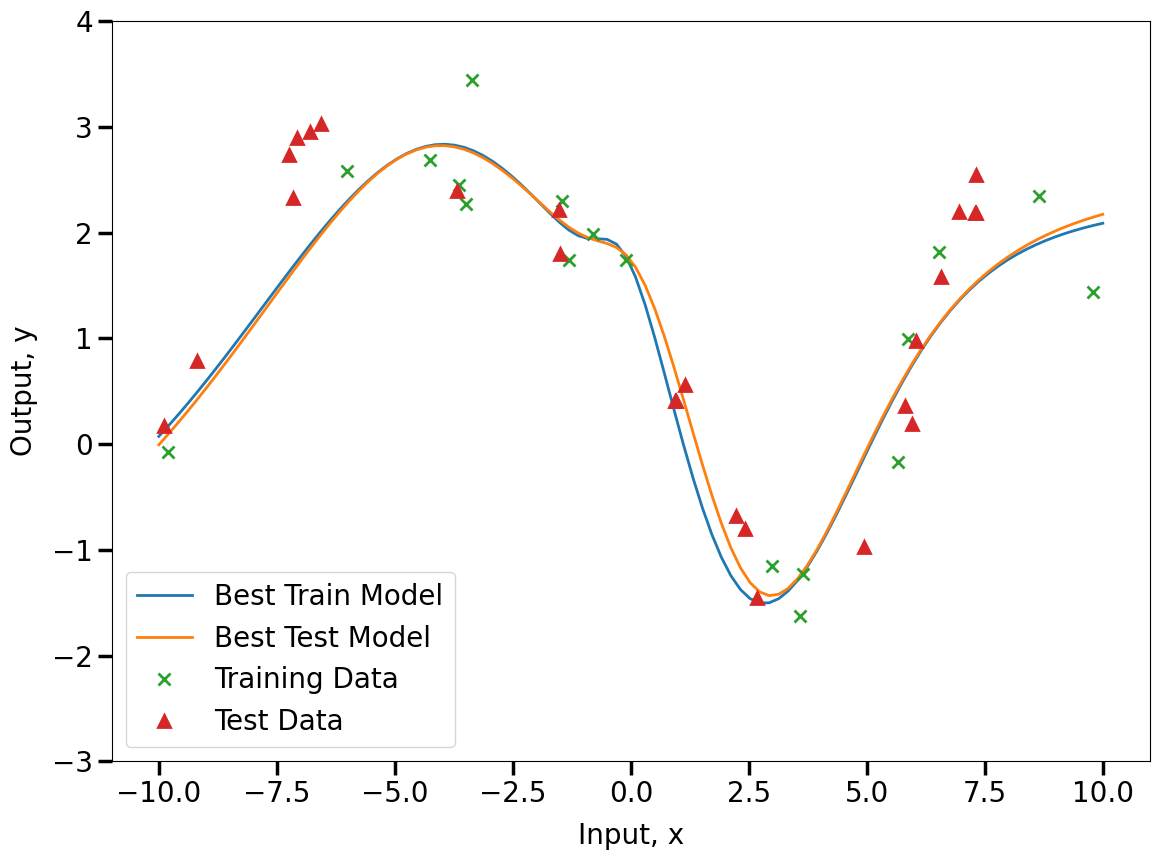

In [134]:
# best_layers = layers[np.argmin(test_losses)]
# best_layers = layers[-1]

best_train_model = MLPModel(layers[np.argmin(train_losses)])
_ = best_train_model.fit(x_train, y_train)

best_test_model = MLPModel(layers[np.argmin(test_losses)])
_ = best_test_model.fit(x_train, y_train)

# mlp_model = MLPModel(hidden_sizes=best_layers, activation_function=activation_functions['relu'])


x_support = torch.linspace(-10., 10., 100).numpy()
plt.close('all')
plt.figure()
plt.plot(x_support, best_train_model.predict(x_support), label='Best Train Model')
plt.plot(x_support, best_test_model.predict(x_support), label='Best Test Model')
plt.plot(x_train, y_train, 'x', label='Training Data')
plt.plot(x_test, y_test, '^', label='Test Data')
plt.legend()
plt.xlabel('Input, x')
plt.ylabel('Output, y')
plt.ylim([-3, 4])
plt.tight_layout()
plt.savefig(f"{str(best_train_model)}_approximated_systems.png", format="png")
plt.show()